In [259]:
from qiskit import  Aer, ClassicalRegister, QuantumRegister, QuantumCircuit, execute
from qiskit.circuit.library import IntegerComparator
# import basic plot tools
from qiskit.visualization import plot_histogram

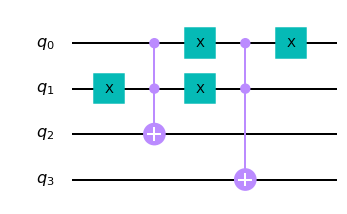

In [260]:
def bitComparator():
    qc = QuantumCircuit(4)
    
    qc.x(1)

    qc.ccx(0,1,2)

    qc.x(0)
    qc.x(1)
    
    qc.ccx(0,1,3)

    qc.x(0)

    # We will return the diffuser as a gate
    #U_c = qc.to_gate()
    #U_c.name = "$U_c$"
    return qc    


test = bitComparator()
test.draw()

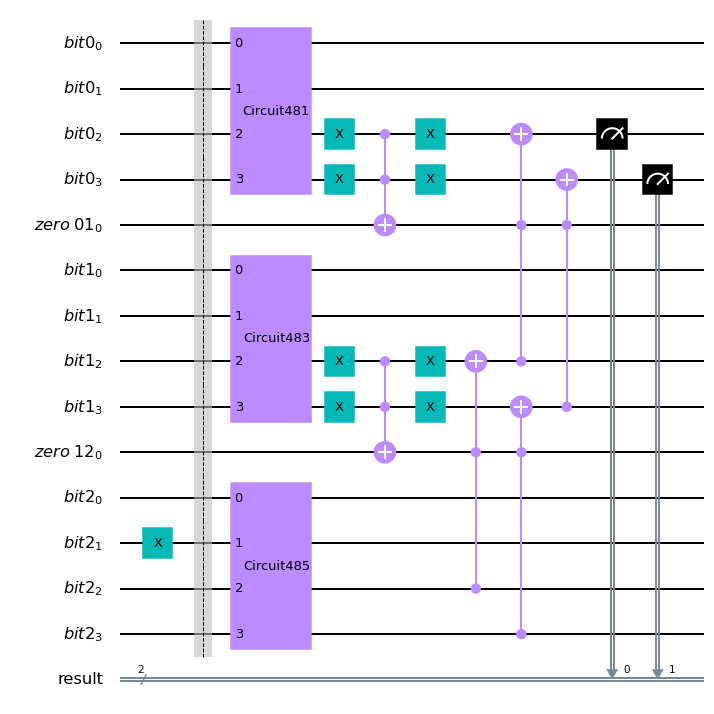

In [261]:

value = "000"
threshold = "001"


b0 = QuantumRegister(4, name="bit0")
z0_1 = QuantumRegister(1, name="zero 01")
b1 = QuantumRegister(4, name="bit1")
z1_2 = QuantumRegister(1, name="zero 12")
b2 = QuantumRegister(4, name="bit2")

r = ClassicalRegister(2, name="result") #Classical output

qc = QuantumCircuit(b0, z0_1, b1, z1_2, b2, r)


if value[0] == "1":
    qc.x(b0[0])
if value[1] == "1":
    qc.x(b1[0])
if value[2] == "1":
    qc.x(b2[0])

if threshold[0] == "1":
    qc.x(b0[1])
if threshold[1] == "1":
    qc.x(b1[1])
if threshold[2] == "1":
    qc.x(b2[1])    

qc.barrier()

bc0 = bitComparator()
bc1 = bitComparator()
bc2 = bitComparator()
qc.append(bc0, [0,1,2,3])
qc.append(bc1, [5,6,7,8])
qc.append(bc2, [10,11,12,13])

qc.x(2)
qc.x(3)
qc.ccx(2,3,4)
qc.x(2)
qc.x(3)

qc.x(7)
qc.x(8)
qc.ccx(7,8,9)
qc.x(7)
qc.x(8)
qc.ccx(12,9,7)
qc.ccx(13,9,8)

qc.ccx(7,4,2)
qc.ccx(8,4,3)

qc.measure([2,3], r)

qc.draw()


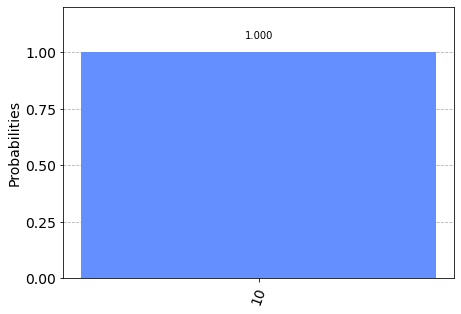

In [262]:
qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=qasm_simulator, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)